

**Dataset Overview**

The dataset used in this project contains information on house sale prices in King County, Washington, which includes the city of Seattle. This dataset captures data on homes that were sold between May 2014 and May 2015. It provides a variety of attributes related to each property, including sale price, physical characteristics of the homes (such as square footage, number of bedrooms and bathrooms, and other features), and geographic details like location.

This dataset offers valuable insights for analyzing trends in the real estate market within this time frame and region. By examining these attributes, we can explore factors that may influence house prices and potentially build predictive models to estimate sale prices based on these characteristics.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/housesalesprediction/kc_house_data.csv


### Importing all the necessary packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [6]:
df = pd.read_csv("/kaggle/input/housesalesprediction/kc_house_data.csv", index_col = 0)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 1

In [10]:
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


From this distribution, it is evident that single-story and two-story homes are the most common, comprising the majority of houses sold. Properties with 1.5, 2.5, 3, and 3.5 floors make up a smaller portion of the dataset, suggesting these floor layouts are less prevalent in the market. This breakdown provides useful context for analyzing how floor levels may relate to other factors like price or location within the dataset.

Text(0.5, 1.0, 'Waterfront and price')

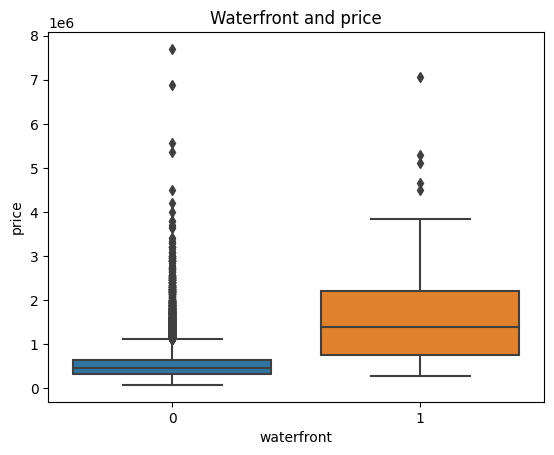

In [11]:
sns.boxplot(x=df['waterfront'], y=df['price'], data=df)
plt.title("Waterfront and price")

Waterfront properties have a noticeably higher median price compared to non-waterfront properties. This suggests that waterfront access significantly increases a property's value. Properties without waterfront access have a wider spread in prices, with many lower-priced properties and several outliers reaching higher prices.
Waterfront properties, while generally more expensive, show a narrower range in prices.
Both categories have outliers, represented by individual dots above the main box. These outliers are properties that are priced significantly higher than the rest in each category. Non-waterfront properties have a higher number of extreme outliers, showing a few properties that are valued similarly to waterfront properties.

Overall, this plot indicates that waterfront access is associated with a premium in housing prices, reflecting the higher value buyers place on this feature.

In [ ]:
#visualize of descriptive statistics for price
fig=px.box(x=data['price'])
fig.update_layout(xaxis_title='Price',
                  title='visualize of descriptive statistics for price')
fig.show()

Text(0.5, 1.0, 'Price and square foot above')

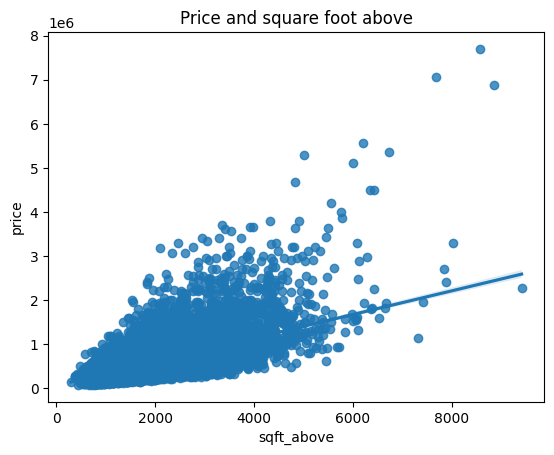

In [12]:
sns.regplot(x=df['sqft_above'], y=df['price'], data=df)
plt.title('Price and square foot above')

The plot indicates a positive correlation between the size of a house (above ground) and its price, though other factors likely influence the price as well. The data shows that while larger homes generally cost more, smaller homes can also have high prices depending on other features or location.

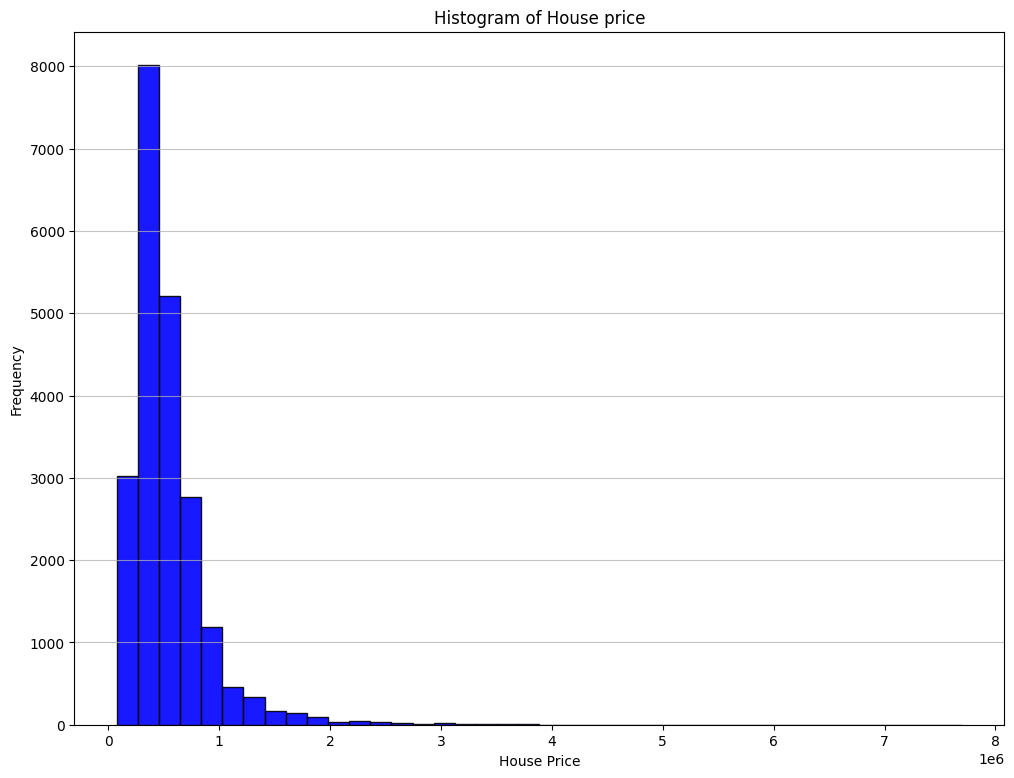

In [44]:
plt.figure(figsize=(12, 9))
plt.hist(df['price'], bins=40, color='blue', alpha=0.9, edgecolor='black')
plt.title('Histogram of House price')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

This distribution shows that most houses in King County are priced below $1 million, while a few properties are significantly more expensive, creating a right-skewed distribution. This skew suggests that the market is primarily composed of mid-range properties, with a smaller luxury segment at much higher price points.

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. The goal is to predict the dependent variable based on the values of the independent variables, minimizing the difference between predicted and actual values.

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(df[['sqft_living']], df['price'])

LinearRegression()

In [16]:
lm.score(df[['sqft_living']], df['price'])

0.4928532179037931

This R-squared score of 0.4928, or 49.28%, represents the proportion of the variance in the house prices (price) that can be explained by the square footage of living space (sqft_living).
49.28% of the variability in house prices can be explained by the size of the living area.
The remaining 50.72% of the variability in prices is due to other factors not captured by this single predictor, such as location, number of bedrooms, neighborhood, and other features.

In [17]:
Z = df[['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']]

In [18]:
lm.fit(Z, df['price'])

LinearRegression()

In [19]:
lm.score(Z, df['price'])

0.6576672506165839

This R-squared value of 0.6577 implies that your model explains about 65.77% of the variability in house prices based on the selected features. The remaining 34.23% of the variability is due to factors not included in this model, such as other unobserved features or random variation

In [20]:
Input=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures()), ('model', LinearRegression())]

In [21]:
pipe = Pipeline(Input)
Y=df['price']

In [22]:
pipe.fit(Z,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [23]:
pipe.score(Z,Y)

0.7513466389353229

In [24]:
lm.predict(Z)

array([287160.14176653, 661944.14176653, 308152.14176653, ...,
       303544.14176653, 426424.14176653, 303544.14176653])

In [25]:
from sklearn.linear_model import Ridge

In [26]:
RidgeModel = Ridge(alpha = 0.1)

In [27]:
X = Z
Y = df['price']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state = 0)

In [30]:
print('Test samples: ', x_test.shape[0])
print('Train samples: ', x_train.shape[0]) #df has n rows and m columns, df(n,m). df.shape[0] returns the number of n(rows)

Test samples:  3242
Train samples:  18371


In [31]:
RidgeModel.fit(x_train, y_train)

Ridge(alpha=0.1)

In [32]:
RidgeModel.score(x_test, y_test)

0.6486079840624546

In [33]:
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']])
x_test_pr = pr.fit_transform(x_test[['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']])

In [34]:
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [35]:
train_score = RidgeModel.score(x_train_pr, y_train)
print('R-squared score for training data is: ', train_score)

R-squared score for training data is:  0.7419988745648411


In [36]:
test_score = RidgeModel.score(x_test_pr, y_test)
print('R-squared score for testing data is: ', test_score)

R-squared score for testing data is:  0.7157120590781471
